https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

https://pandas.pydata.org/docs/user_guide/index.html

In [1]:
import pandas as pd
#from IPython.display import display

In [8]:
project = "../data/ppxlib+1669933149/"
performance_json = project + "performance.json"
commands_json = project + "commands.json"
merlin_responses_json = project + "merlin_responses.json"
logs_json = project + "logs.json"
metadata_json = project + "metadata.json"


In [18]:
performance = pd.read_json(performance_json, lines = True)

In [81]:
sorted_performances1 =  performance.sort_values("max_timing", ascending = False)

In [82]:
sorted_performances = sorted_performances1.drop(columns=["sample_id"])

In [206]:
bad_performing_only = sorted_performances[sorted_performances["max_timing"] > 140]
bad_performing_only

,timings,max_timing,file,query_type,loc
4372,"[100, 145, 127, 100, 133, 120, 101, 137, 124, ...",145,/ast/ast.ml,[Type_enclosing],"File ""/home/sonja/Documents/Tarides/projects/p..."
4394,"[122, 108, 112, 115, 123, 95, 143, 122, 97, 129]",143,/ast/ast.ml,[Case_analysis],"File ""/home/sonja/Documents/Tarides/projects/p..."
4381,"[105, 125, 130, 132, 103, 142, 127, 101, 132, ...",142,/ast/ast.ml,[Type_enclosing],"File ""/home/sonja/Documents/Tarides/projects/p..."


In [118]:
medium_performing_only = sorted_performances[sorted_performances["max_timing"] > 100]
def remove_prefix(text, prefix):
    if text.startswith(prefix):
        return text[len(prefix):]
    return text
def remove_project_prefix(text):
    prefix = "/home/sonja/Documents/Tarides/projects/ppxlib"
    return remove_prefix(text, prefix)
files = medium_performing_only["file"].apply(remove_project_prefix)
files

4372    /ast/ast.ml
4394    /ast/ast.ml
4381    /ast/ast.ml
4431    /ast/ast.ml
4415    /ast/ast.ml
           ...     
4397    /ast/ast.ml
4353    /ast/ast.ml
4410    /ast/ast.ml
4424    /ast/ast.ml
4355    /ast/ast.ml
Name: file, Length: 119, dtype: object

In [32]:
files.drop_duplicates()

4372    /ast/ast.ml
Name: file, dtype: object

In [120]:
all_files = performance["file"].apply(remove_project_prefix).drop_duplicates()
all_files

0                                          /bench/bench.ml
118      /bench/vendored/ppx_sexp_conv.v0.15.1/expander...
204      /bench/vendored/ppx_sexp_conv.v0.15.1/expander...
324      /bench/vendored/ppx_sexp_conv.v0.15.1/expander...
444      /bench/vendored/ppx_sexp_conv.v0.15.1/expander...
                               ...                        
17400                      /test/type_is_recursive/test.ml
17514    /test/expansion_context/map_structure_print_ct...
17591     /test/expansion_context/standalone_print_ctxt.ml
17602       /test/expansion_context/register_print_ctxt.ml
17721               /test/expand-header-and-footer/test.ml
Name: file, Length: 202, dtype: object

In [72]:
sorted_performances["file"]=sorted_performances["file"].apply(remove_prefix)
sorted_performances[(sorted_performances['file'] != '/ast/ast.ml') & (~ sorted_performances['file'].str.startswith("/bench"))].iloc[0]

timings                [26, 26, 25, 45, 26, 26, 26, 31, 35, 26]
max_timing                                                   45
file                                       /astlib/pprintast.ml
query_type                                      [Case_analysis]
loc           File "/home/sonja/Documents/Tarides/projects/p...
Name: 7123, dtype: object

In [79]:
import numpy as np
import matplotlib.pyplot as plt
data = np.random.randn(25, 4)
df = pd.DataFrame(data, columns=list('ABCD'))
df

,A,B,C,D
0,-0.681359,-0.395769,-1.065497,0.919093
1,0.154724,1.550045,-0.478965,-1.261609
2,0.729856,0.343845,1.109262,-0.981633
3,-0.019506,0.871410,0.187706,1.554618
4,0.378092,1.567890,-1.293699,-1.663704
5,-2.134355,0.118248,-0.287826,-1.398836
6,1.511979,0.944569,1.454387,-1.084374
7,-0.979125,-0.210059,1.577516,-0.511921
8,-0.274400,0.327901,-0.161047,-0.216052
9,2.164214,0.555374,0.730905,-1.567371


In [90]:
# pd.DataFrame(sorted_performances1["timings"])
# for x in sorted_performances1["sample_id"]: print(x)
{x:y for (x,y) in [(0,1),(2,3)]}


{0: 1, 2: 3}

In [105]:
# for i, row in sorted_performances1.iterrows(): print(row["sample_id"])
timings_per_query = pd.DataFrame({row["sample_id"] : row["timings"] for i, row in sorted_performances1.iterrows()})

<AxesSubplot: >

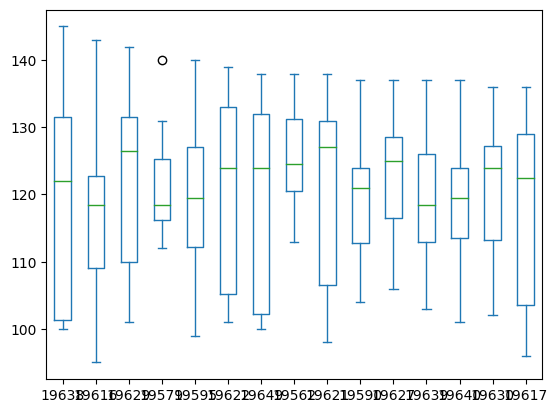

In [116]:
worst_timings = timings_per_query.iloc[:, :15]
worst_timings.plot.box()

<AxesSubplot: >

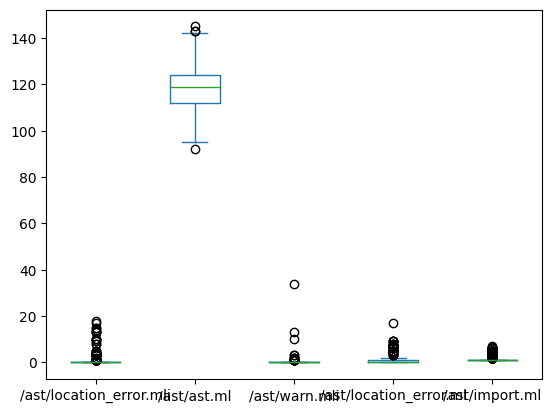

In [228]:
source_files = filter(lambda file: (not file.startswith("/bench")) and (not file.startswith("/test")), all_files)
def get_timings(file):
    return [ t for timings in sorted_performances1[sorted_performances1["file"] == file]["timings"] for t in timings]

d = { file : get_timings(file) for file in source_files }
timings_per_file = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))
timings_per_file.iloc[:, :5].plot.box()

In [ ]:
files_filtered

,file_id,filename
979,1387,../../ppxlib/ast/ast.ml
980,1386,../../ppxlib/ast/location_error.ml
981,1385,../../ppxlib/ast/import.ml
982,1384,../../ppxlib/ast/ast_helper_lite.ml
983,1383,../../ppxlib/ast/ppxlib_ast.ml
...,...,...
1124,1242,../../ppxlib/test/type_is_recursive/test.ml
1125,1241,../../ppxlib/test/expansion_context/map_struct...
1126,1240,../../ppxlib/test/expansion_context/standalone...
1127,1239,../../ppxlib/test/expansion_context/register_p...


In [ ]:
# just for debugging when json doesn't load correctly in next block
import json
for l in open(timing_filename, "r") :
    json.loads(l)

In [ ]:
timing = pd.read_json(timing_filename, lines = True)

timing = pd.merge(timing, files_filtered, on = "file_id")


In [ ]:
ti = timing.sort_values("max_timing", ascending = False)
ti.drop(columns=["sample_id"])

,timings,max_timing,file_id,query_type,filename
29,"[524, 184, 164, 172, 171, 170, 128, 98, 96, 98]",524,1387,locate,../../ppxlib/ast/ast.ml
166,"[248, 7, 6, 6, 6, 6, 7, 7, 8, 6]",248,1382,locate,../../ppxlib/ast/versions.ml
2690,"[191, 34, 33, 33, 30, 33, 31, 34, 36, 30]",191,1281,locate,../../ppxlib/traverse/ppxlib_traverse.ml
749,"[191, 26, 25, 25, 30, 25, 25, 25, 25, 28]",191,1357,locate,../../ppxlib/astlib/pprintast.ml
18,"[108, 123, 190, 166, 164, 174, 170, 158, 97, 106]",190,1387,locate,../../ppxlib/ast/ast.ml
...,...,...,...,...,...
1608,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,1323,locate,../../ppxlib/astlib/pp/pp.ml
1613,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,1323,locate,../../ppxlib/astlib/pp/pp.ml
2795,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,1273,locate,../../ppxlib/test/error_embedding/extender.ml
2948,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,1260,locate,../../ppxlib/test/driver/exception_handling/ex...


In [ ]:
ti.query('file_id == 1387')

,timings,max_timing,file_id,query_type,sample_id,filename
29,"[524, 184, 164, 172, 171, 170, 128, 98, 96, 98]",524,1387,locate,35739,../../ppxlib/ast/ast.ml
18,"[108, 123, 190, 166, 164, 174, 170, 158, 97, 106]",190,1387,locate,35750,../../ppxlib/ast/ast.ml
13,"[169, 188, 99, 102, 102, 111, 108, 162, 184, 168]",188,1387,locate,35755,../../ppxlib/ast/ast.ml
16,"[133, 107, 103, 113, 187, 162, 164, 173, 166, ...",187,1387,locate,35752,../../ppxlib/ast/ast.ml
8,"[111, 187, 173, 168, 180, 179, 147, 104, 132, ...",187,1387,locate,35760,../../ppxlib/ast/ast.ml
9,"[187, 171, 169, 172, 169, 166, 107, 104, 104, ...",187,1387,locate,35759,../../ppxlib/ast/ast.ml
5,"[124, 104, 105, 110, 185, 163, 171, 172, 165, ...",185,1387,locate,35763,../../ppxlib/ast/ast.ml
12,"[167, 171, 148, 98, 129, 107, 107, 112, 185, 177]",185,1387,locate,35756,../../ppxlib/ast/ast.ml
1,"[167, 169, 159, 95, 125, 113, 105, 109, 184, 170]",184,1387,locate,35767,../../ppxlib/ast/ast.ml
11,"[169, 169, 168, 163, 100, 100, 109, 106, 109, ...",184,1387,locate,35757,../../ppxlib/ast/ast.ml


In [ ]:
filenames = pd.read_json(files, lines = True)
filenames

,file_id,filename
0,12,./bin/data.ml
1,11,./bin/bin_tree.ml
2,10,./bin/import.ml
3,9,./bin/main.ml
4,8,./_build/default/bin/data.ml
5,7,./_build/default/bin/bin_tree.ml
6,6,./_build/default/bin/import.pp.ml
7,5,./_build/default/bin/import.ml
8,4,./_build/default/bin/main.pp.ml
9,3,./_build/default/bin/data.pp.ml


In [ ]:
filenames.index = filenames.file_id

In [ ]:
filenames

,file_id,filename
file_id,,
12,12,./bin/data.ml
11,11,./bin/bin_tree.ml
10,10,./bin/import.ml
9,9,./bin/main.ml
8,8,./_build/default/bin/data.ml
7,7,./_build/default/bin/bin_tree.ml
6,6,./_build/default/bin/import.pp.ml
5,5,./_build/default/bin/import.ml
4,4,./_build/default/bin/main.pp.ml


In [ ]:
filenames.loc[9].filename

'./bin/main.ml'

In [ ]:
filenames.at[9, "filename"]

'./bin/main.ml'